<a href="https://colab.research.google.com/github/JORDANGAMBA99/Data-Science-Projects/blob/main/Predicting_Telecust_using_KNN_Nearest_Neighbor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Loading the dataset**

In [ ]:
df = pd.read_csv('/content/teleCust1000t.csv')

In [ ]:
df.head()
# The target variable is custcat

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


**Getting to know the dataset**

In [ ]:
for i in df.columns:
  print(i)
  print(df[i].value_counts())
  print("-----------------------------")

region
region
3    344
2    334
1    322
Name: count, dtype: int64
-----------------------------
tenure
tenure
72    31
48    20
24    20
3     20
13    19
      ..
47     7
36     7
2      7
21     6
63     6
Name: count, Length: 72, dtype: int64
-----------------------------
age
age
33    39
39    35
35    34
34    32
31    32
37    31
42    28
40    28
30    26
52    25
36    25
46    24
48    24
27    24
43    24
41    24
54    24
45    24
51    23
50    23
25    23
28    22
32    21
47    21
26    21
55    21
38    21
44    20
57    20
24    20
29    19
53    19
49    18
23    16
22    15
59    14
63    12
60    11
56    11
61    11
58    10
64    10
20    10
62     9
21     8
66     7
68     6
69     6
65     6
67     5
19     4
76     3
70     3
75     2
71     1
72     1
74     1
77     1
18     1
73     1
Name: count, dtype: int64
-----------------------------
marital
marital
0    505
1    495
Name: count, dtype: int64
-----------------------------
address
address
1     68
2  

In [ ]:
df.drop(['ed','employ'],axis=1, inplace=True)

In [ ]:
df.head()

,region,tenure,age,marital,address,income,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,0.0,0,2,1
1,3,11,33,1,7,136.0,0.0,0,6,4
2,3,68,52,1,24,116.0,0.0,1,2,3
3,2,33,33,0,12,33.0,0.0,1,1,1
4,2,23,30,1,9,30.0,0.0,0,4,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   retire   1000 non-null   float64
 7   gender   1000 non-null   int64  
 8   reside   1000 non-null   int64  
 9   custcat  1000 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 78.3 KB


**EDA**

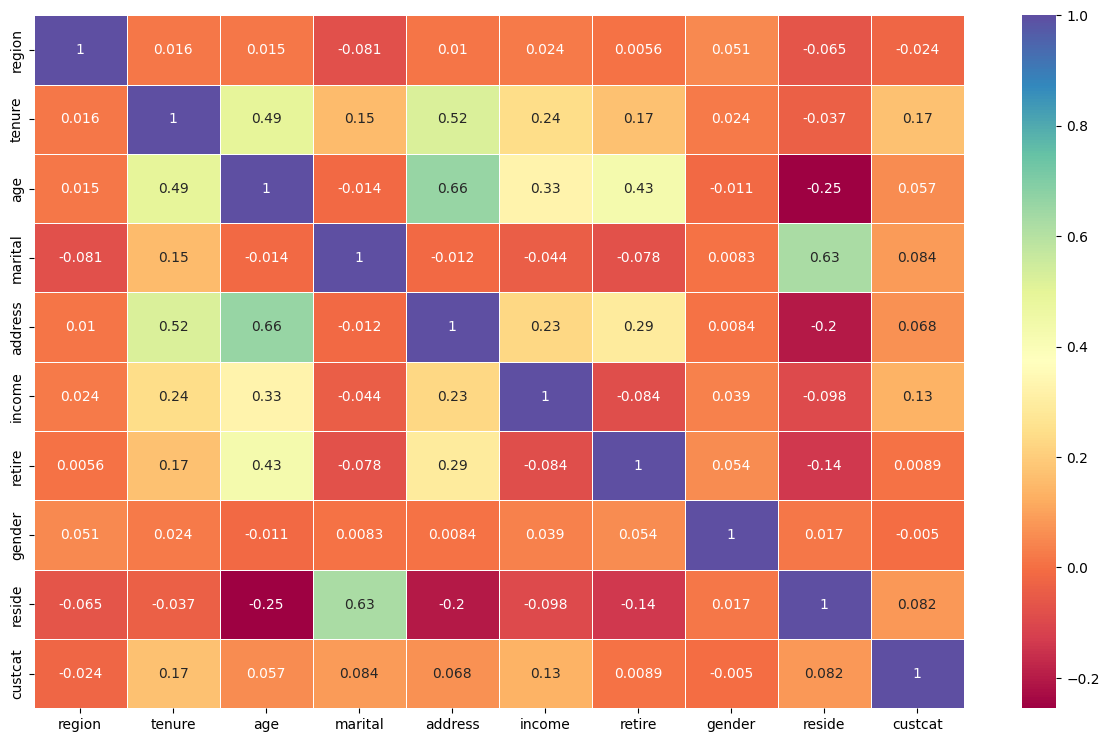

In [ ]:
plt.figure(figsize =(15,9))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,cmap='Spectral')
plt.show()

**We look at the coorelation between the vaiables and the target variable.If it has little coorelation or a high coorelation with the target variable(custcat) we usually drop the value**

**Due to the overall low coorelation with target variable we might not get a high score because there is low coorelation.Thats why feature enginnering is applicable where we create new values or we request different data from the company**

**We drop the values with the lowest coorelation from the dataset**

In [ ]:
df.drop(['retire','gender'],axis=1,inplace=True)

In [ ]:
df.head()

,region,tenure,age,marital,address,income,reside,custcat
0,2,13,44,1,9,64.0,2,1
1,3,11,33,1,7,136.0,6,4
2,3,68,52,1,24,116.0,2,3
3,2,33,33,0,12,33.0,1,1
4,2,23,30,1,9,30.0,4,3


**Region and reside are categorical features.So we have to convert them to a dummy structure.**

In [ ]:
region_dummies = pd.get_dummies(df['region'],drop_first=True,prefix='region')
reside_dummies = pd.get_dummies(df['reside'],drop_first=True,prefix='reside')

In [ ]:
df.head()

,region,tenure,age,marital,address,income,reside,custcat
0,2,13,44,1,9,64.0,2,1
1,3,11,33,1,7,136.0,6,4
2,3,68,52,1,24,116.0,2,3
3,2,33,33,0,12,33.0,1,1
4,2,23,30,1,9,30.0,4,3


In [ ]:
df = pd.concat([df,region_dummies,reside_dummies],axis=1)

In [ ]:
df.head()

,region,tenure,age,marital,address,income,reside,custcat,region_2,region_3,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8
0,2,13,44,1,9,64.0,2,1,True,False,True,False,False,False,False,False,False
1,3,11,33,1,7,136.0,6,4,False,True,False,False,False,False,True,False,False
2,3,68,52,1,24,116.0,2,3,False,True,True,False,False,False,False,False,False
3,2,33,33,0,12,33.0,1,1,True,False,False,False,False,False,False,False,False
4,2,23,30,1,9,30.0,4,3,True,False,False,False,True,False,False,False,False


**We dropped the region and reside columns**

In [ ]:
df.drop(['region','reside'],axis=1,inplace=True)

In [ ]:
df.head()

,tenure,age,marital,address,income,custcat,region_2,region_3,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8
0,13,44,1,9,64.0,1,True,False,True,False,False,False,False,False,False
1,11,33,1,7,136.0,4,False,True,False,False,False,False,True,False,False
2,68,52,1,24,116.0,3,False,True,True,False,False,False,False,False,False
3,33,33,0,12,33.0,1,True,False,False,False,False,False,False,False,False
4,23,30,1,9,30.0,3,True,False,False,False,True,False,False,False,False


**Standardisation of variables**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaled_variable = df[['tenure','age','income']]

In [ ]:
scaled_variable

,tenure,age,income
0,13,44,64.0
1,11,33,136.0
2,68,52,116.0
3,33,33,33.0
4,23,30,30.0
...,...,...,...
995,10,39,27.0
996,7,34,22.0
997,67,59,944.0
998,70,49,87.0


In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(scaled_variable)

StandardScaler()

In [ ]:
scaled_variable =  scaler.transform(scaled_variable)

In [ ]:
df_scaled = pd.DataFrame(scaled_variable,columns=['tenure','age','income'])

In [ ]:
df_scaled.head()

,tenure,age,income
0,-1.055125,0.184505,-0.126506
1,-1.148806,-0.691812,0.546450
2,1.521092,0.821826,0.359517
3,-0.118319,-0.691812,-0.416251
4,-0.586722,-0.930808,-0.444291


In [ ]:
df.head()

,tenure,age,marital,address,income,custcat,region_2,region_3,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8
0,13,44,1,9,64.0,1,True,False,True,False,False,False,False,False,False
1,11,33,1,7,136.0,4,False,True,False,False,False,False,True,False,False
2,68,52,1,24,116.0,3,False,True,True,False,False,False,False,False,False
3,33,33,0,12,33.0,1,True,False,False,False,False,False,False,False,False
4,23,30,1,9,30.0,3,True,False,False,False,True,False,False,False,False


In [ ]:
df.drop(['tenure','age','address','income'],axis=1,inplace=True)

In [ ]:
df = pd.concat([df,df_scaled],axis=1)

In [ ]:
df.head()

,marital,custcat,region_2,region_3,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8,tenure,age,income
0,1,1,True,False,True,False,False,False,False,False,False,-1.055125,0.184505,-0.126506
1,1,4,False,True,False,False,False,False,True,False,False,-1.148806,-0.691812,0.546450
2,1,3,False,True,True,False,False,False,False,False,False,1.521092,0.821826,0.359517
3,0,1,True,False,False,False,False,False,False,False,False,-0.118319,-0.691812,-0.416251
4,1,3,True,False,False,False,True,False,False,False,False,-0.586722,-0.930808,-0.444291


**KNN Modelling**

In [ ]:
X = df.drop(['custcat'],axis=1)
y = df['custcat']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print("Train with:",X_train.shape,y_train.shape)
print("Test with:",X_test.shape,y_test.shape)

Train with: (800, 13) (800,)
Test with: (200, 13) (200,)


In [ ]:
from sklearn.neighbors import  KNeighborsClassifier

In [ ]:
k = 4
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train,y_train)
knn_model

KNeighborsClassifier(n_neighbors=4)

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
from sklearn import metrics
print("Accuracy score:",metrics.accuracy_score(y_test,y_pred))

Accuracy score: 0.32


**The model gives us a low score because of the features in the datset have a low coorelation to the dataset**

**Hyperparameter Optimization with Python**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
knn_model3 = KNeighborsClassifier()

In [ ]:
knn_params = {'n_neighbors':np.arange(1,50),
              'metric':['minkowski','euclidean','manhattan'],
              'weights':['uniform','distance']}

In [ ]:
knn_cv_model = GridSearchCV(estimator= knn_model3,param_grid=knn_params,cv=10)

In [ ]:
knn_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']})

In [ ]:
knn_cv_model.best_params_

{'metric': 'minkowski', 'n_neighbors': np.int64(37), 'weights': 'uniform'}

In [ ]:
knn_tuned = KNeighborsClassifier(n_neighbors=15)

In [ ]:
knn_tuned.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
y_pred = knn_tuned.predict(X_test)

In [ ]:
print("Accuracy score:",metrics.accuracy_score(y_test,y_pred))

Accuracy score: 0.36
